# Compare all the available meteo data for B2 site
 ---
**Description:** this script will compare all the available meteorological data for the station B2 located in Val Mazia (Italy)

**Author:** Elisa Bortoli (elisa.bortoli@eurac.edu)

**Credits:** Giacomo Bertoldi (giacomo.bertoldi@eurac.edu)

**Date:** 2019-07-23

**Version:** 1.0

**Usage:** simple run

**Python version:** 3.6.8

**Requirements:** Python modules: os, glob, sys, numpy, pandas, matplotlib, datetime

 **Notes:** 
- The test setup can be found at:
https://github.com/geotopmodel/geotop/tree/v3.0/tests/1D/Matsch_B2_Ref_007


- The meteorological data used can be found at:
    - input meteo: 
    https://raw.githubusercontent.com/geotopmodel/geotop/master/tests/1D/Matsch_B2_Ref_007/meteo0001.txt
    
    - obs meteo: 
    https://github.com/EURAC-Ecohydro/MonaLisa/tree/master/geotop/1D/Matsch_B2_Optim_001/obs
    
    - bottazzi meteo: 
    https://github.com/EURAC-Ecohydro/MonaLisa/blob/master/geotop/1D/Matsch_B2_Optim_001/meteoB2_irr_0001.txt

## Import the necessary modules

In [1]:
import os 
import glob 
import sys
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

## Set working paths of the simulation

In [3]:
B2_path = r"/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007"

# Simulations
sim_data = B2_path + r"/data_simulated"
sim_path = sim_data + r"/sim_2"

# Observations
obs_data = B2_path + r"/data_observed"
obs_path = obs_data + r"/obs-bottazzi"

# Comparison
comparison_meteo = obs_data + r"/comparison_meteo"

## Load meteo data

### Given Input

In [4]:
# Read in list of files
meteo_path = sim_path + r"/meteo/"

# Select only point0*.txt files
os.chdir(meteo_path)
unsorted_meteo_files = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files = sorted(unsorted_meteo_files, key=str.lower)

# Imports files into pandas dataframe
meteo_data = []
for j,trace in enumerate(meteo_files):
    filepath = os.path.join(meteo_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date'], # Date format is correct
                                index_col = ['Date'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    meteo_data.append(traces_series)
list(traces_series)

['JDfrom0',
 'Iprec',
 'WindSp',
 'WindDir',
 'RelHum',
 'AirT',
 'SWglobal',
 'CloudTrans']

In [5]:
# Effective start and end
print("Practice")
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
print("len(period_data) = ", len(traces_series))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,0,0)
end  = datetime.datetime(2015,12,31,23,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series))

Practice
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Theory
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Missing data =  0


### Bottazzi

In [6]:
# Read in list of files
meteo_path_B = obs_data + r"/meteo-bottazzi-tagliato/"

# Select only point0*.txt files
os.chdir(meteo_path_B)
unsorted_meteo_files_B = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files_B = sorted(unsorted_meteo_files_B, key=str.lower)

# Imports files into pandas dataframe
meteo_data_B = []
for j,trace in enumerate(meteo_files_B):
    filepath = os.path.join(meteo_path_B, trace)
    traces_series_B = pd.read_csv(filepath,
                                parse_dates = ['Date'], # Date format is correct
                                index_col = ['Date'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    meteo_data_B.append(traces_series_B)
list(traces_series_B)

['JDfrom0',
 'Iprec',
 'WindSp',
 'WindDir',
 'RelHum',
 'AirT',
 'SWglobal',
 'CloudTrans']

In [7]:
# Effective start and end
print("Practice")
print("start = ", traces_series_B.index.min())
print("end   = ", traces_series_B.index.max())
print("len(period_data) = ", len(traces_series_B))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,0,0)
end  = datetime.datetime(2015,12,31,23,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series_B))

Practice
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Theory
start =  2009-10-02 00:00:00
end   =  2015-12-31 23:00:00
len(period_data) =  54768
 ------------------------------------------- 
Missing data =  0


### Obs

In [8]:
# Select only obs*.txt files
os.chdir(obs_path)
unsorted_obs_files = glob.glob("obs*.txt")

# Sort in alphabetical order files
obs_files = sorted(unsorted_obs_files, key=str.lower)

# Imports files into pandas dataframe
observed_data = []
for j,trace in enumerate(obs_files):
    filepath = os.path.join(obs_path, trace)
    traces_series_obs = pd.read_csv(filepath,
                                parse_dates = ['Date12.DDMMYYYYhhmm.'], # Date format is correct
                                index_col = ['Date12.DDMMYYYYhhmm.'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    observed_data.append(traces_series_obs)
list(traces_series_obs)

['rainfall_amount',
 'wind_speed',
 'wind_from_direction',
 'relative_humidity',
 'air_temperature',
 'surface_downwelling_shortwave_flux',
 'soil_moisture_content_50',
 'soil_moisture_content_200',
 'latent_heat_flux_in_air',
 'sensible_heat_flux_in_air']

In [9]:
# Effective start and end
print("Practice")
print("start = ", traces_series_obs.index.min())
print("end   = ", traces_series_obs.index.max())
print("len(period_data) = ", len(traces_series_obs))
print(" ------------------------------------------- ")
print("Theory")
start = datetime.datetime(2009,10,2,1,0)
end  = datetime.datetime(2016,1,11,7,0)
period_theory = pd.date_range(start, end, freq='H')
print("start = ", start)
print("end   = ", end)
print("len(period_data) = ", len(period_theory))
print(" ------------------------------------------- ")
print("Missing data = ", len(period_theory)-len(traces_series_obs))
gaps = period_theory[~period_theory.isin(traces_series_obs.index)]
print(gaps)

Practice
start =  2009-10-02 01:00:00
end   =  2016-01-11 07:00:00
len(period_data) =  55009
 ------------------------------------------- 
Theory
start =  2009-10-02 01:00:00
end   =  2016-01-11 07:00:00
len(period_data) =  55015
 ------------------------------------------- 
Missing data =  6
DatetimeIndex(['2010-03-28 02:00:00', '2011-03-27 02:00:00',
               '2012-03-25 02:00:00', '2013-03-31 02:00:00',
               '2014-03-30 02:00:00', '2015-03-29 02:00:00'],
              dtype='datetime64[ns]', freq=None)


## (1) Plot Input meteo vs Meteo Bottazzi

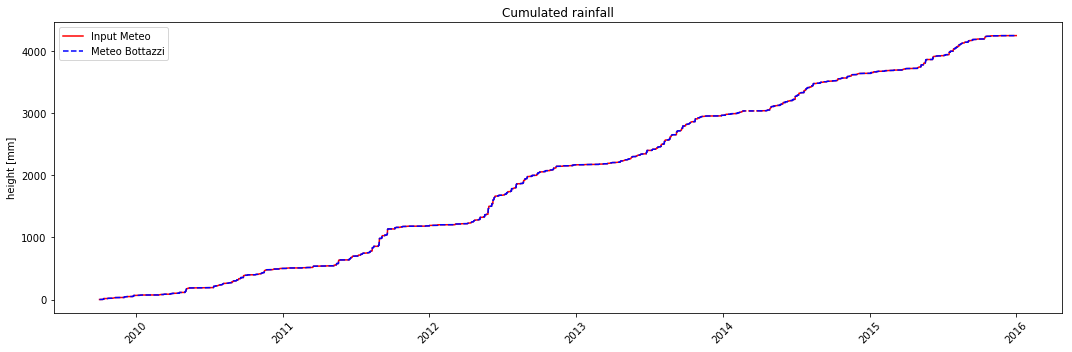

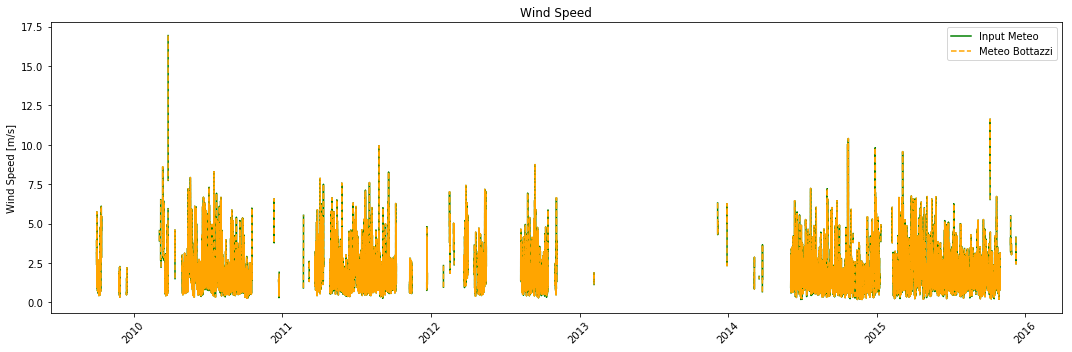

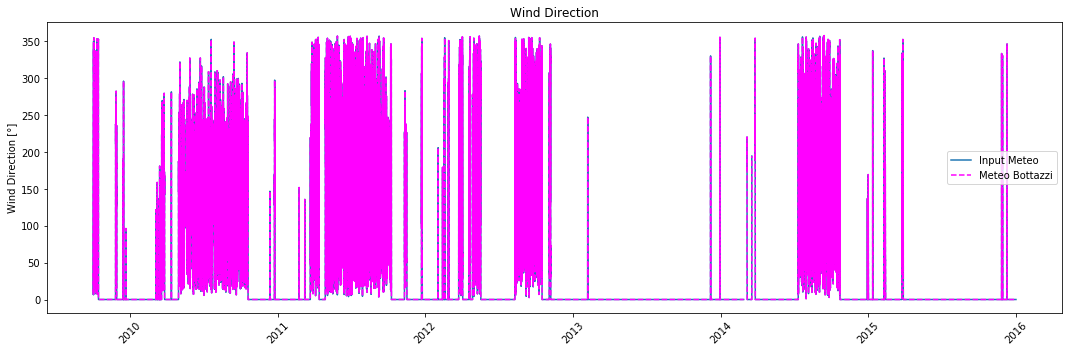

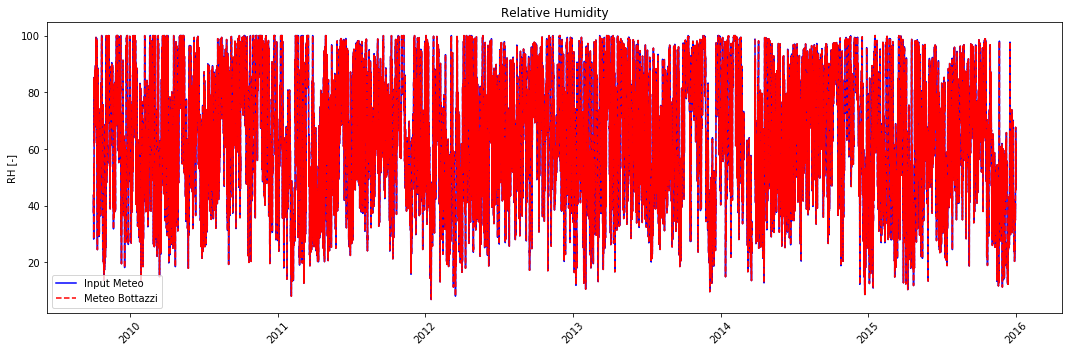

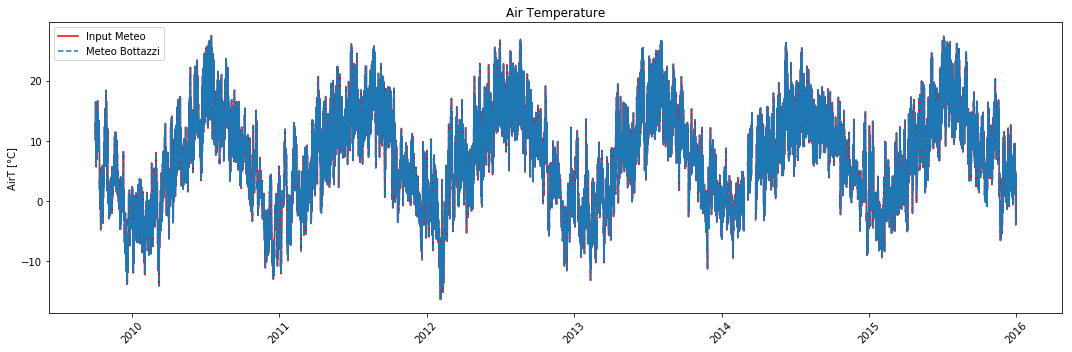

In [10]:
# Plot the desired parameterb
# Date,JDfrom0,Iprec,WindSp,WindDir,RelHum,AirT,SWglobal,CloudTrans
for i in range(0,len(meteo_files)):
    meteodata = meteo_data[i]
    meteodata_B = meteo_data_B[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['Iprec'].cumsum(), color = 'red')
        plt.plot(meteodata_B.index, meteodata_B['Iprec'].cumsum(), color='blue', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['WindSp'], color = 'green')
        plt.plot(meteodata_B.index, meteodata_B['WindSp'], color = 'orange', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['WindDir'])
        plt.plot(meteodata_B.index, meteodata_B['WindDir'], color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['RelHum'], color = 'blue')
        plt.plot(meteodata_B.index, meteodata_B['RelHum'], color = 'red', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['AirT'], color = 'red')
        plt.plot(meteodata_B.index, meteodata_B['AirT'], linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
#        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['Swglobal'], color = 'green')
        plt.plot(meteodata_B.index, meteodata_B['SWglobal'],color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo Bottazzi']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("SWglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_SW.png"))
    # -----------------------------------------------------------------------------------------------
# plt.close('all');
plt.show();

## (1a) Input meteo - Meteo Bottazzi

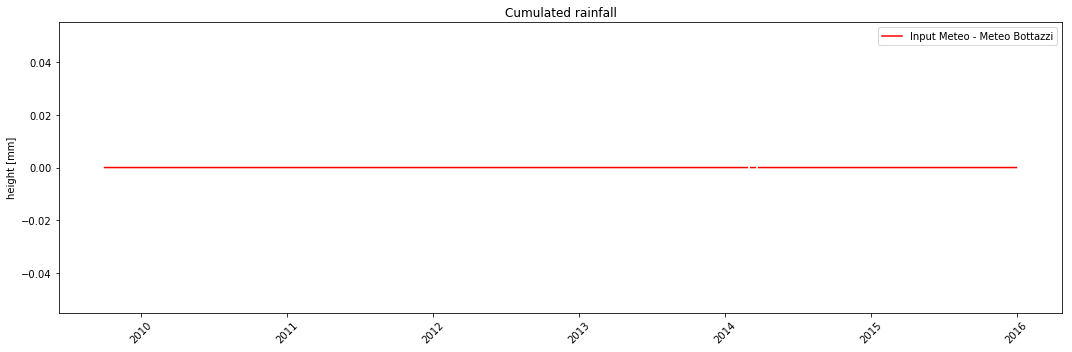

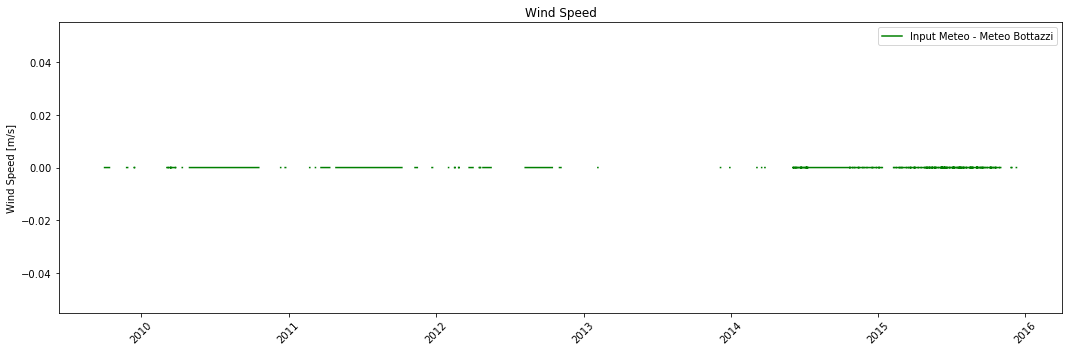

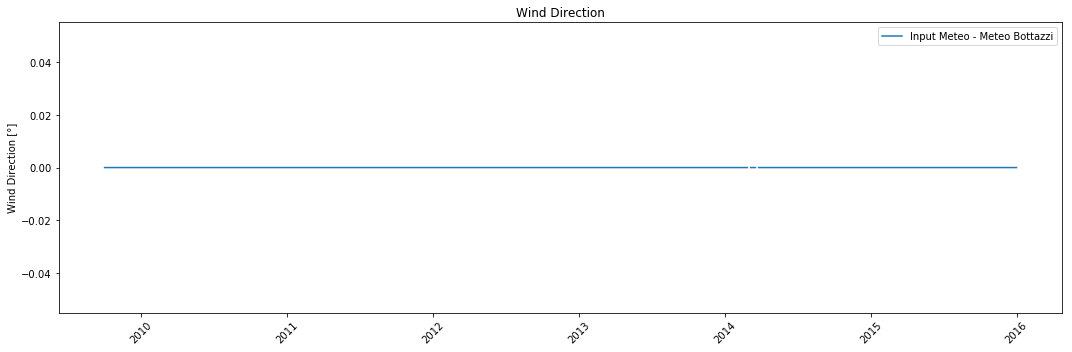

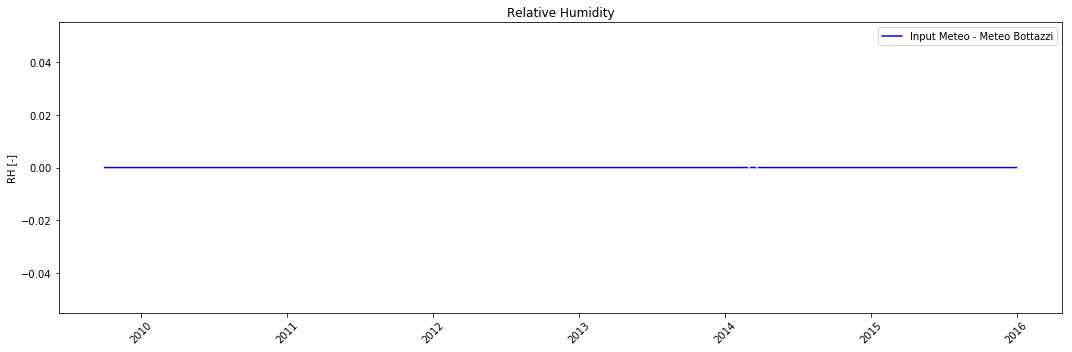

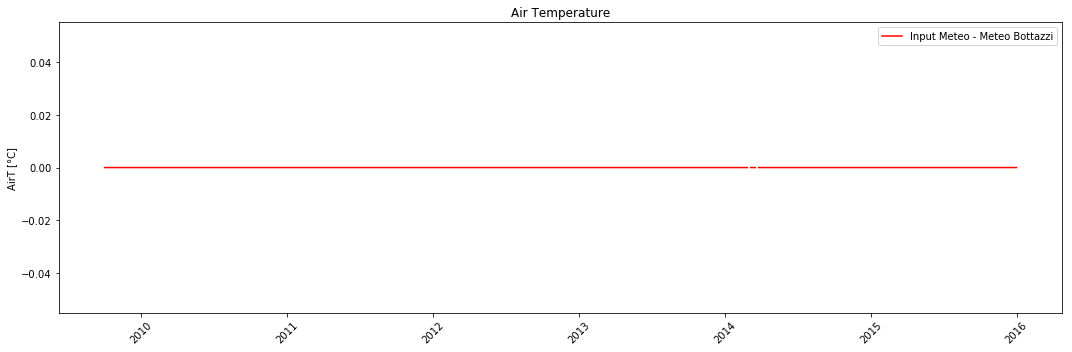

In [11]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteodata = meteo_data[i]
    meteodata_B = meteo_data_B[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['Iprec'].cumsum() - meteodata_B['Iprec'].cumsum(),
                 color = 'red')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['WindSp']- meteodata_B['WindSp'], 
                 color = 'green')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['WindDir']- meteodata_B['WindDir'])
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['RelHum']- meteodata_B['RelHum'], 
                 color = 'blue')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['AirT'] - meteodata_B['AirT'], 
                 color = 'red')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['Swglobal'] - meteodata_B['SWglobal'], 
                 color = 'green')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo Bottazzi']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("SWglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "1_input_bott_diff_SW.png"))
    # -----------------------------------------------------------------------------------------------
#plt.close('all')
plt.show();

## (2) Plot Input meteo vs Meteo contained in obs file

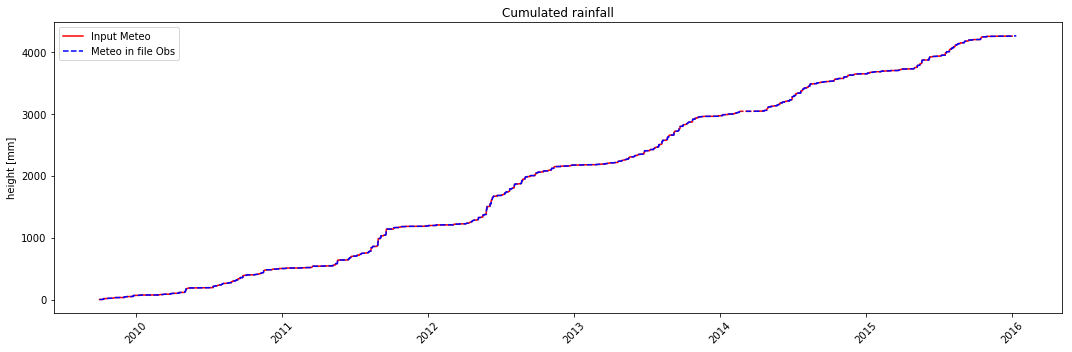

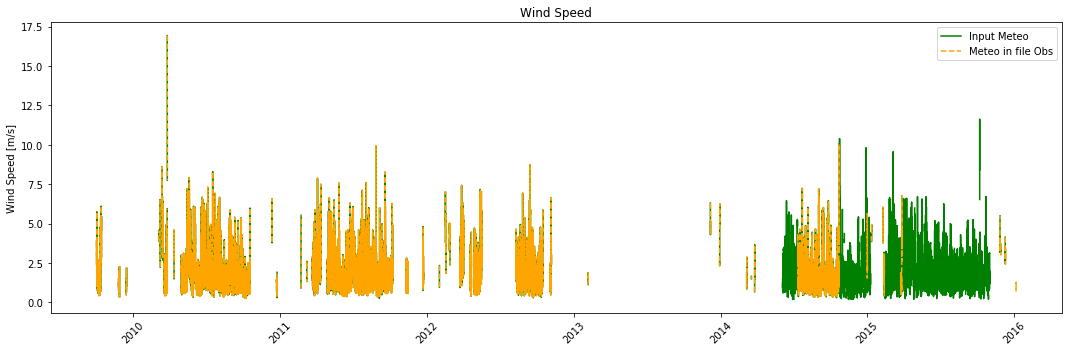

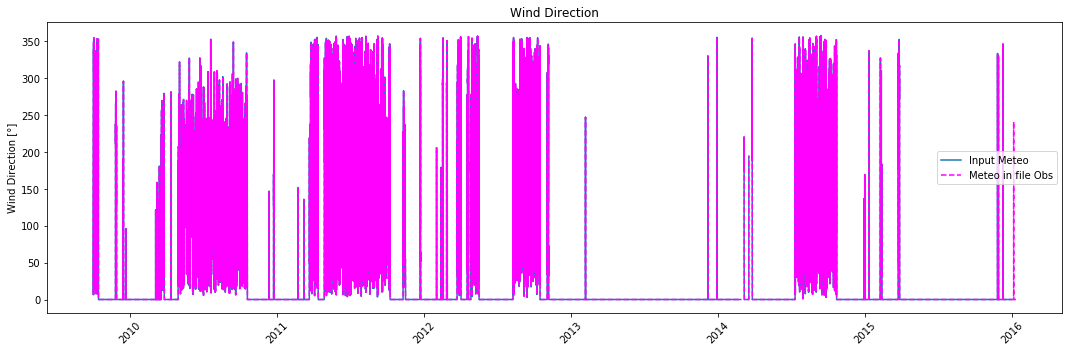

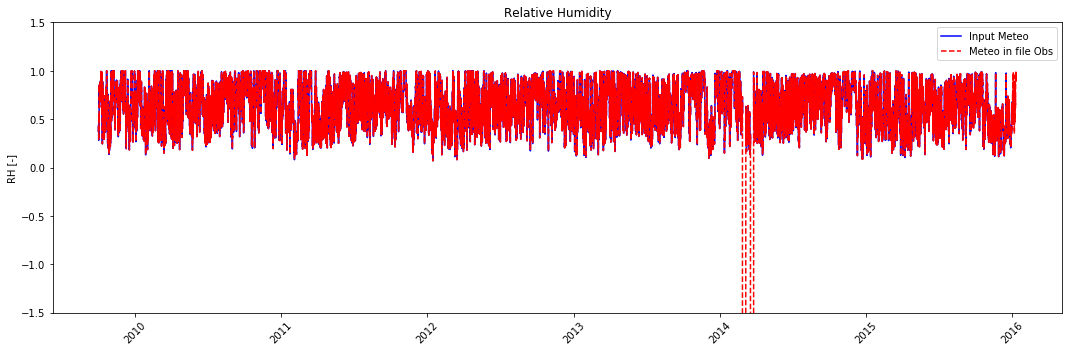

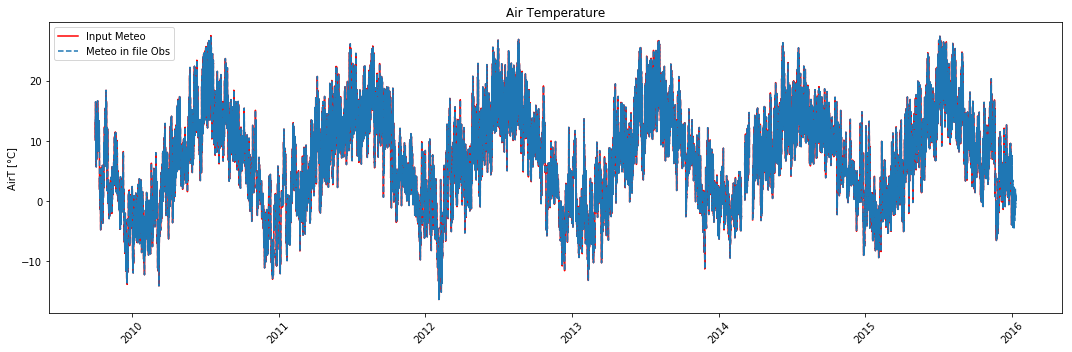

In [12]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteodata = meteo_data[i]
    obsdata = observed_data[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['Iprec'].cumsum(), color = 'red')
        plt.plot(obsdata.index, obsdata['rainfall_amount'].cumsum(), color='blue', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['WindSp'], color = 'green')
        plt.plot(obsdata.index, obsdata['wind_speed'], color = 'orange', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['WindDir'])
        plt.plot(obsdata.index, obsdata['wind_from_direction'], color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['RelHum']/100, color = 'blue')
        plt.plot(obsdata.index, obsdata['relative_humidity'], color = 'red', linestyle='--')
        plt.xticks(rotation=45)
        plt.ylim(-1.5,1.5)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['AirT'], color = 'red')
        plt.plot(obsdata.index, obsdata['air_temperature'], linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, meteodata['Swglobal'], color = 'green')
        plt.plot(obsdata.index, obsdata['surface_downwelling_shortwave_flux'],color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo','Meteo in file Obs']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("Swglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_SW.png"))
    # -----------------------------------------------------------------------------------------------
#     # All data are NaN
#     if 'CloudTrans' in mydata.columns:
#         plt.figure(figsize = (10,3))
#         plt.plot(mydata.index, mydata['CloudTrans'], color = 'black')
#         plt.xticks(rotation=45)
#         plt.ylim(0,1)
#         plt.title("Cloud Transmissivity")
#         plt.ylabel("CloudTrans [-]")
#         plt.tight_layout()
#         plt.show()
#        plt.savefig(os.path.join(meteo_path, "%s_CloudTrans.png" % meteo_files[i]))
# plt.close('all')
plt.show();

## (2a) Input meteo - Observed data

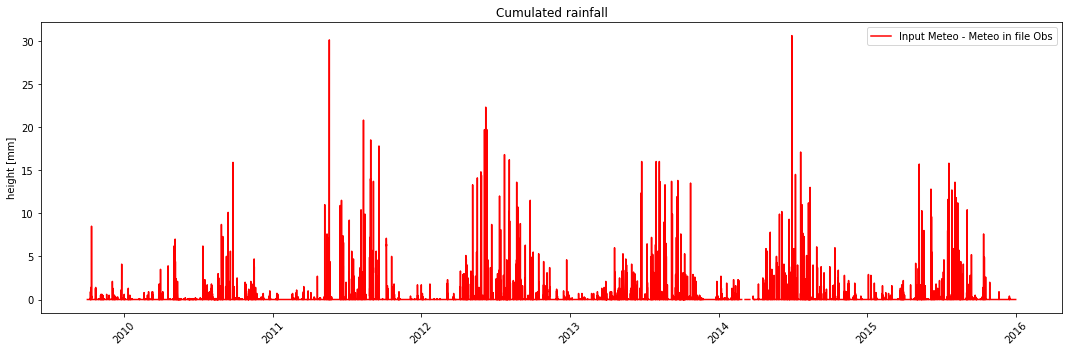

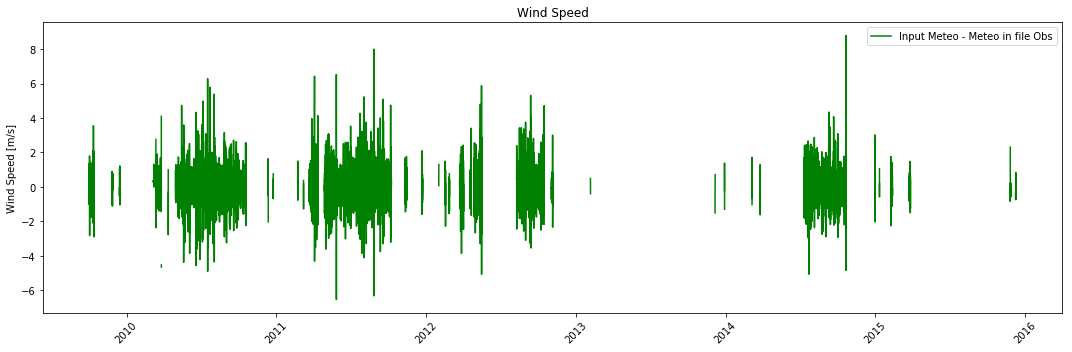

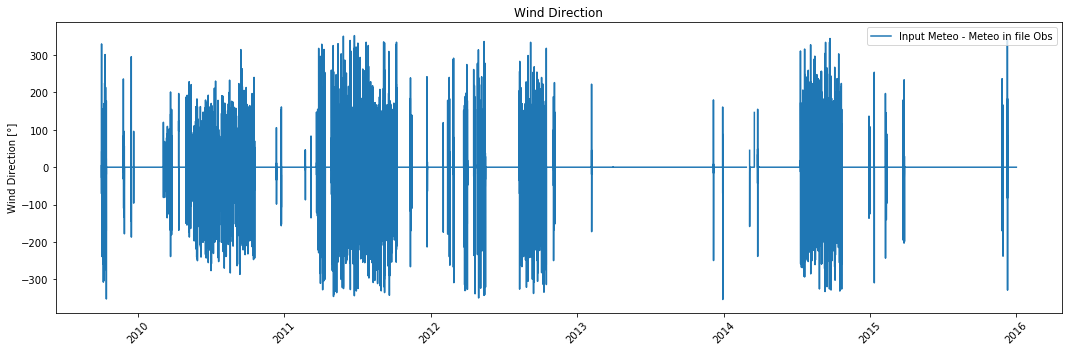

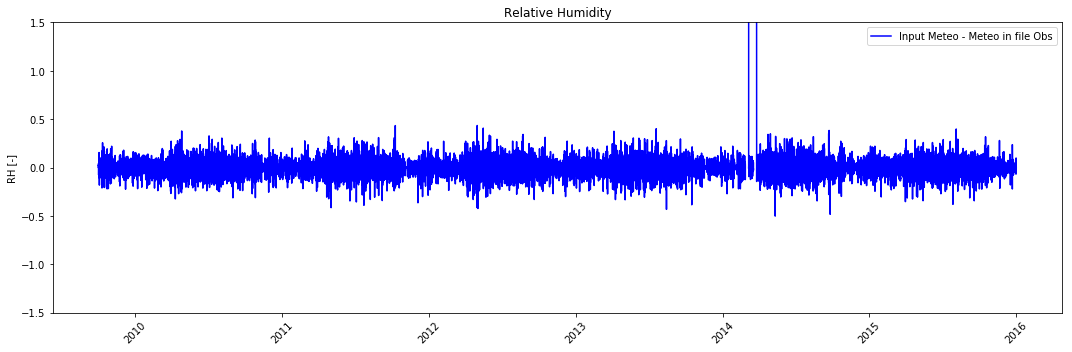

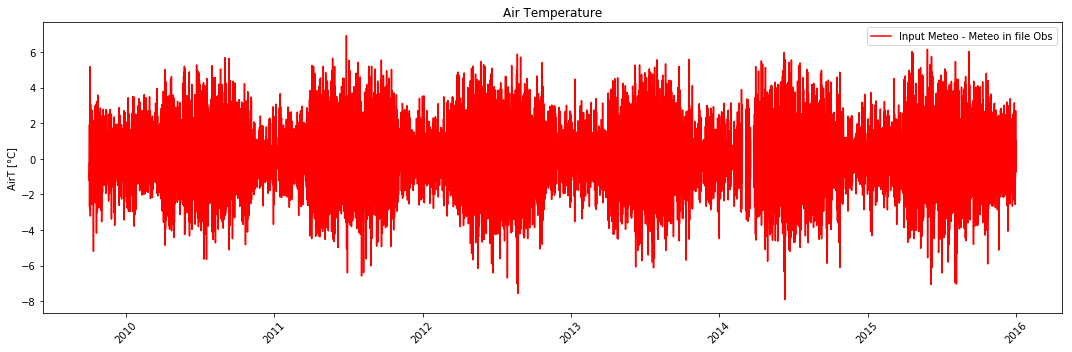

In [13]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteodata = meteo_data[i]
    obsdata = observed_data[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['Iprec'][1:len(meteodata['Iprec'])].cumsum()
                 - obsdata['rainfall_amount'][0:-247].cumsum(), 
                 color = 'red')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['WindSp'][1:len(meteodata['Iprec'])]
                 - obsdata['wind_speed'][0:-247], 
                 color = 'green')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['WindDir'][1:len(meteodata['Iprec'])]
                 - obsdata['wind_from_direction'][0:-247])
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['RelHum'][1:len(meteodata['Iprec'])]/100
                 - obsdata['relative_humidity'][0:-247], 
                 color = 'blue')
        plt.xticks(rotation=45)
        plt.ylim(-1.5,1.5)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['AirT'][1:len(meteodata['Iprec'])]
                 - obsdata['air_temperature'][0:-247], 
                 color = 'red')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata.index, 
                 meteodata['Swglobal'][1:len(meteodata['Iprec'])]
                 - obsdata['surface_downwelling_shortwave_flux'][0:-247], 
                 color = 'green')
        plt.xticks(rotation=45)
        plt.legend(['Input Meteo - Meteo in file Obs']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("Swglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "2_input_obs_diff_SW.png"))
        plt.savefig(os.path.join(meteo_path, "%s_Swglob.png" % meteo_files[i]))
    # -----------------------------------------------------------------------------------------------
#     # All data are NaN
#     if 'CloudTrans' in mydata.columns:
#         plt.figure(figsize = (10,3))
#         plt.plot(mydata.index, mydata['CloudTrans'], color = 'black')
#         plt.xticks(rotation=45)
#         plt.ylim(0,1)
#         plt.title("Cloud Transmissivity")
#         plt.ylabel("CloudTrans [-]")
#         plt.tight_layout()
#         plt.show()
#        plt.savefig(os.path.join(meteo_path, "%s_CloudTrans.png" % meteo_files[i]))
# plt.close('all')
plt.show();

## (3) Plot Meteo Bottazzi vs Meteo contained in obs file

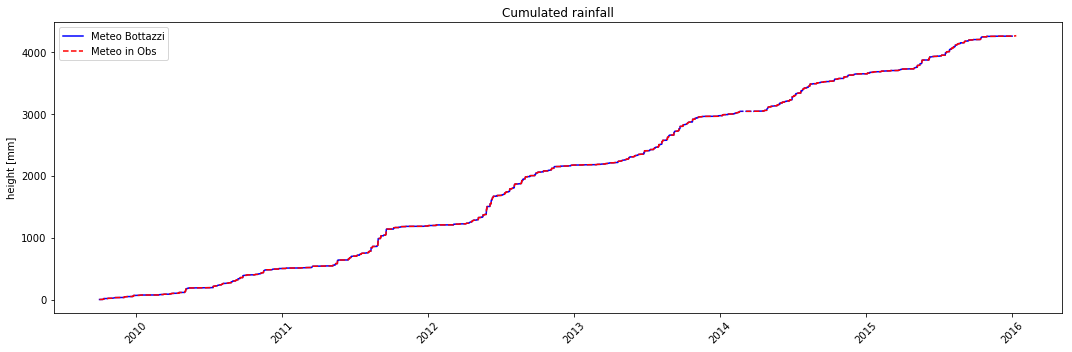

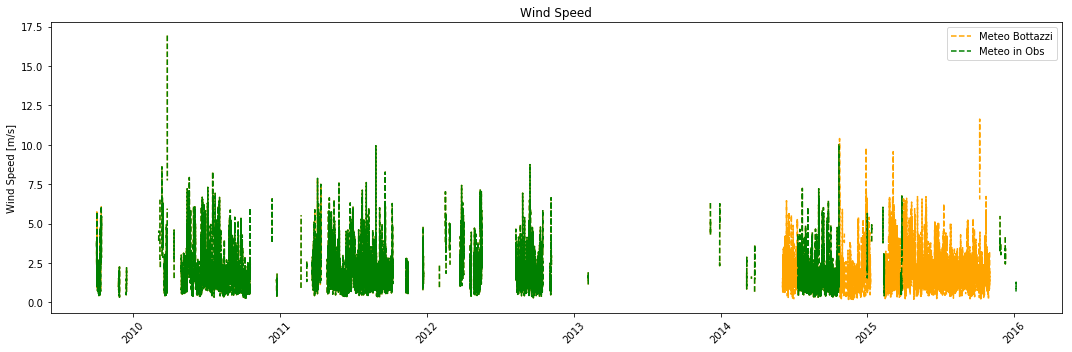

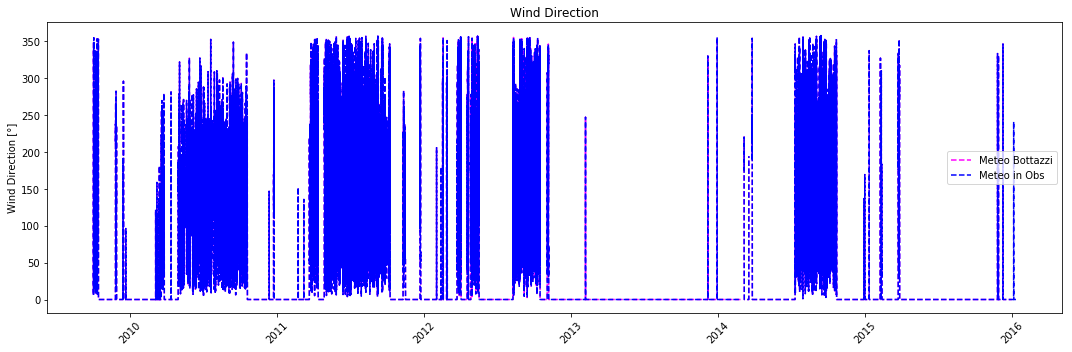

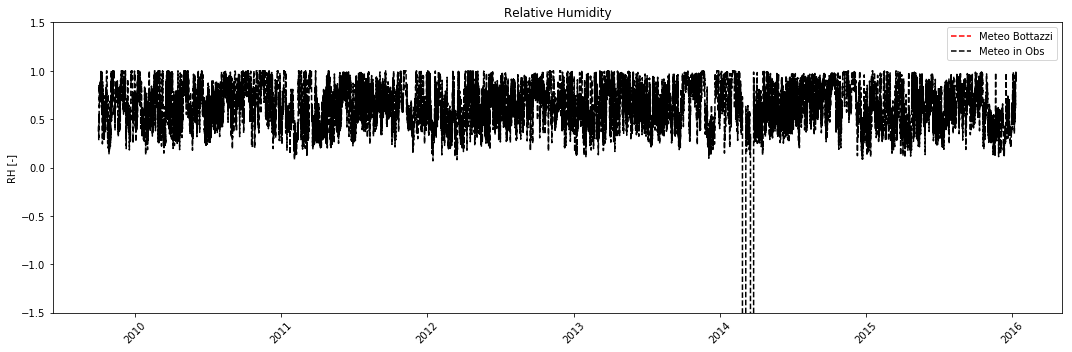

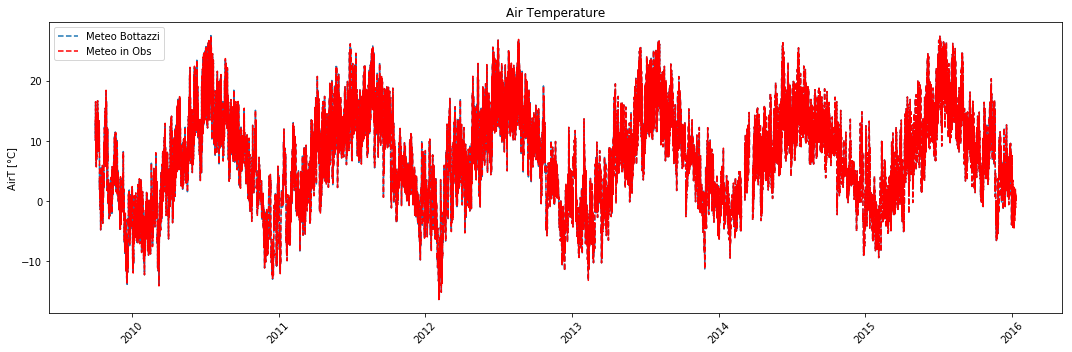

In [14]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteodata_B = meteo_data_B[i]
    obsdata = observed_data[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['Iprec'].cumsum(), color='blue', linestyle='-')
        plt.plot(obsdata.index, obsdata['rainfall_amount'].cumsum(), color='red', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['WindSp'], color = 'orange', linestyle='--')
        plt.plot(obsdata.index, obsdata['wind_speed'], color = 'green', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['WindDir'], color = 'magenta', linestyle='--')
        plt.plot(obsdata.index, obsdata['wind_from_direction'], color = 'blue', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['RelHum'], color = 'red', linestyle='--')
        plt.plot(obsdata.index, obsdata['relative_humidity'], color = 'black', linestyle='--')
        plt.xticks(rotation=45)
        plt.ylim(-1.5,1.5)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['AirT'], linestyle='--')
        plt.plot(obsdata.index, obsdata['air_temperature'], color = 'red', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, meteodata_B['SWglobal'],color = 'magenta', linestyle='--')
        plt.plot(obsdata.index, obsdata['surface_downwelling_shortwave_flux'],color = 'green', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi', 'Meteo in Obs']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("SWglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_SW.png"))
    # -----------------------------------------------------------------------------------------------
#plt.close('all')
plt.show();

## (3a) Meteo Bottazzi - Meteo in obs

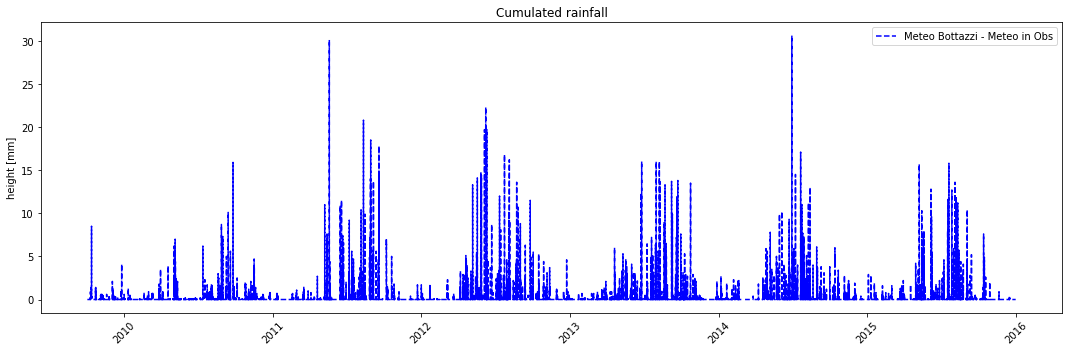

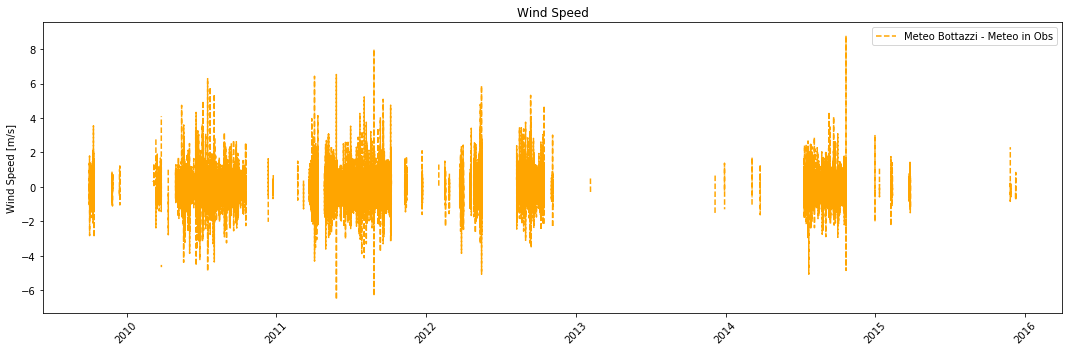

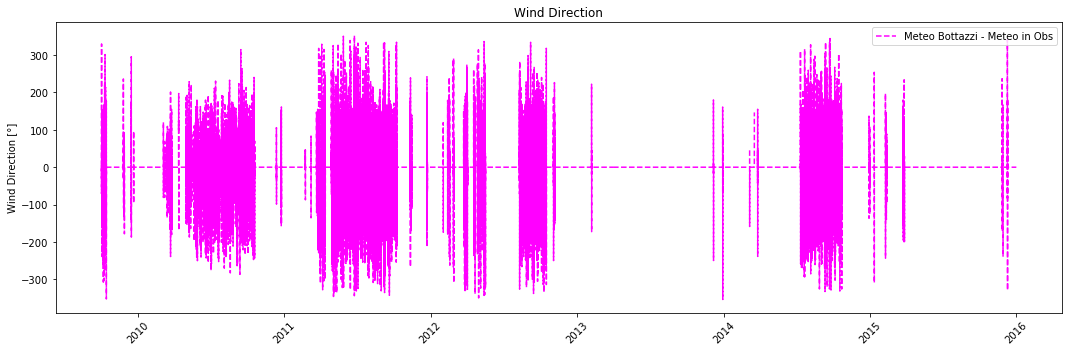

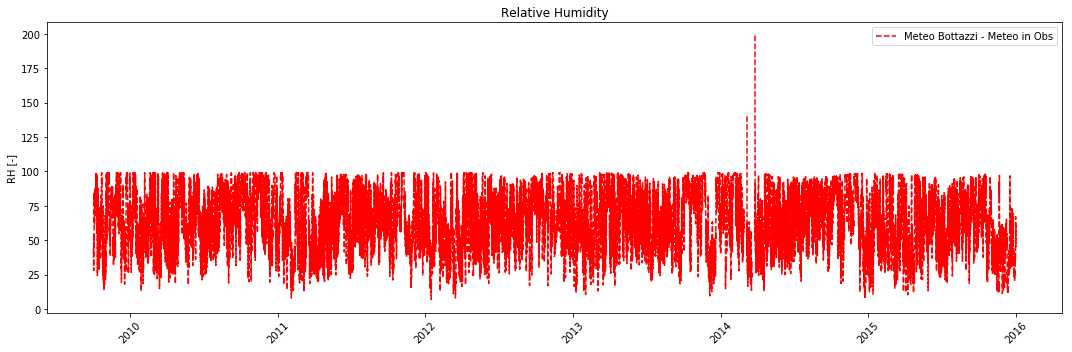

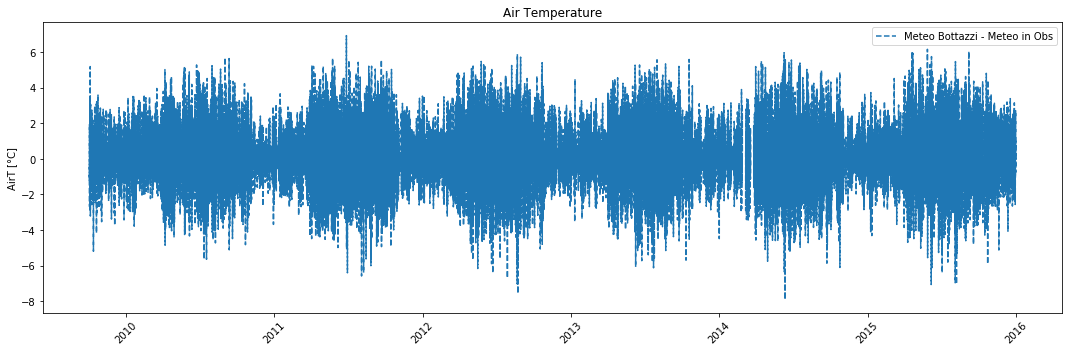

In [15]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteodata_B = meteo_data_B[i]
    obsdata = observed_data[i]
    # -----------------------------------------------------------------------------------------------
    if 'Iprec' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index,
                 meteodata_B['Iprec'][1:len(meteodata_B)].cumsum()- obsdata['rainfall_amount'][0:-247].cumsum(),
                 color='blue', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Cumulated rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_Pcum.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindSp' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, 
                 meteodata_B['WindSp'][1:len(meteodata_B)]-obsdata['wind_speed'][0:-247], 
                 color = 'orange', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Wind Speed")
        plt.ylabel("Wind Speed [m/s]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_Ws.png"))
    # -----------------------------------------------------------------------------------------------
    if 'WindDir' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, 
                 meteodata_B['WindDir'][1:len(meteodata_B)]-obsdata['wind_from_direction'][0:-247], 
                 color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Wind Direction")
        plt.ylabel("Wind Direction [°]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_Wd.png"))
    # -----------------------------------------------------------------------------------------------
    if 'RelHum' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, 
                 meteodata_B['RelHum'][1:len(meteodata_B)]-obsdata['relative_humidity'][0:-247], 
                 color = 'red', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_RH.png"))
    # -----------------------------------------------------------------------------------------------
    if 'AirT' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, 
                 meteodata_B['AirT'][1:len(meteodata_B)]-obsdata['air_temperature'][0:-247], 
                 linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_Tair.png"))
    # -----------------------------------------------------------------------------------------------
    if 'Swglobal' in meteodata_B.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteodata_B.index, 
                 meteodata_B['SWglobal'][1:len(meteodata_B)]-obsdata['surface_downwelling_shortwave_flux'][0:-247],
                 color = 'magenta', linestyle='--')
        plt.xticks(rotation=45)
        plt.legend(['Meteo Bottazzi - Meteo in Obs']) 
        plt.title("Global Short Wave Radiation")
        plt.ylabel("SWglob [W/m2]")
        plt.tight_layout()
        plt.savefig(os.path.join(comparison_meteo, "3_bott_obs_diff_SWin.png"))
   # -----------------------------------------------------------------------------------------------
plt.show();
#plt.close('all')

In [16]:
# N° of hours of 2016 to remove from Observations to be compared with Meteo data 
# 10*24+7